# Image Classification using CNNs
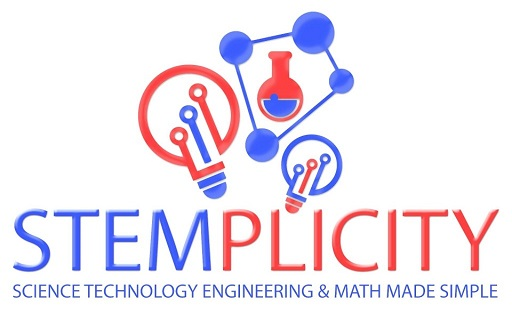

You need to classify images based on previous knowledge adquired from the CIFAR-10 dataset.

In this challenge we have a CIFAR-10 dataset consisting in 60000 low resolution images divided into the following 10 classes: 

- Airplanes
- Cars 
- Birds
- Cats
- Deer
- Dogs
- Frogs
- Horses
- Ships
- Trucks

#### **Main Objective**: The main objective is to build a image classifier


## Table of Contents

1. [Import Libraries](#1)
2. [Import Data](#2)
    - 2.1. [Data Visualization](#2.1)
3. [Data Preparation](#3)
    - 3.1. [One Hot Encoding Target Variable](#3.1)
    - 3.2. [Data Normalization](#3.2)
    - 3.3. [Age Column](#3.3)
    - 3.4. [Country Column](#3.4)
4. [One Hot Encoding](#4)
5. [Feature Selection](#5)
6. [Train Test Split](#6)
7. [Data Normalization](#7)
8. [Model Training](#8)
9. [Model Evaluation](#9)

# STEP #1: IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
import keras

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# STEP #2: IMPORT DATA

In [2]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

## STEP #2.1: Data Visualization

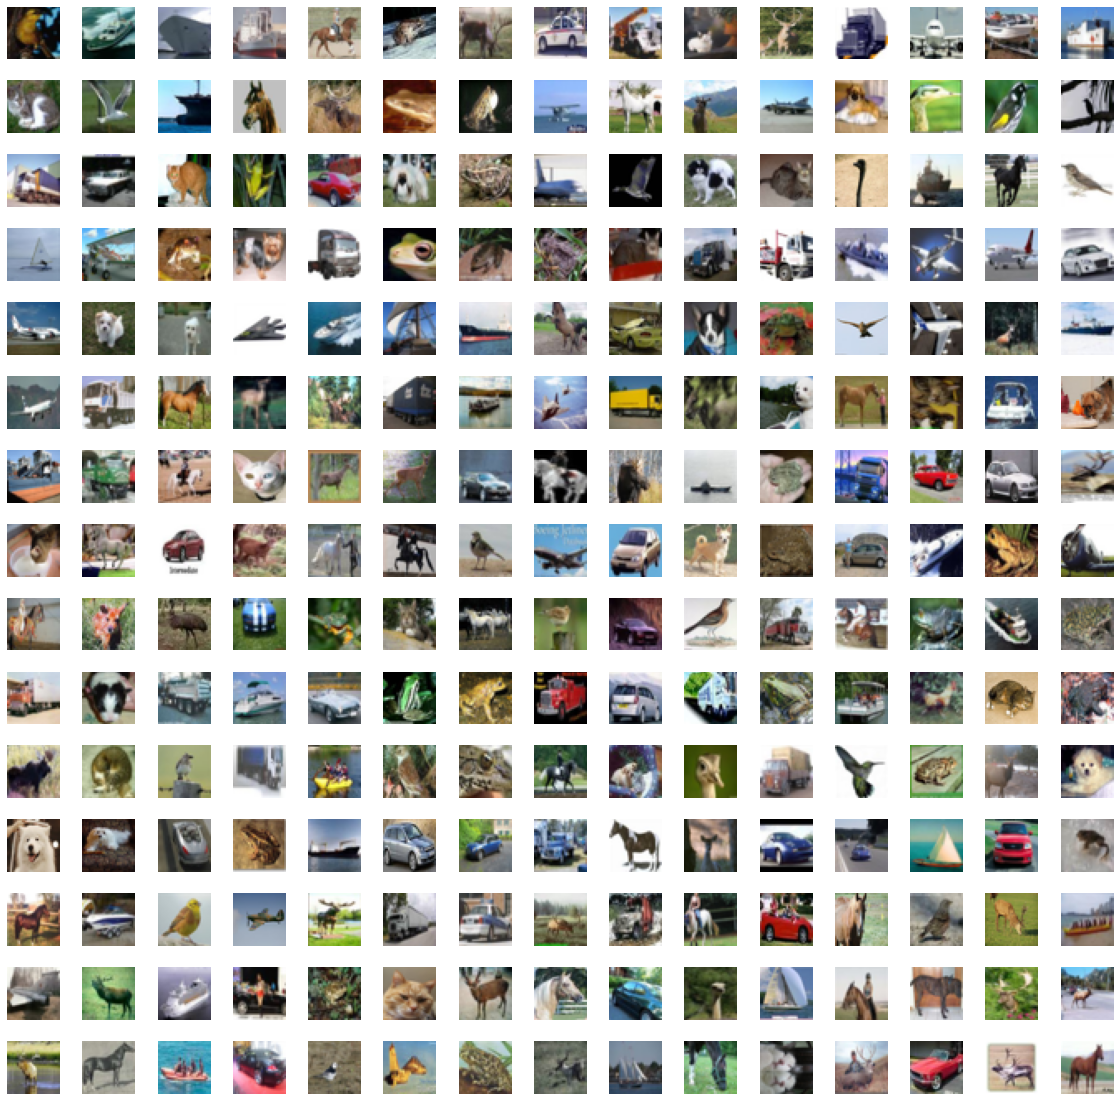

In [3]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20, 20))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# STEP #3: DATA PREPARATION
## STEP #3.1: ONE HOT ENCODING THE TARGET VARIABLE

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
number_categories = 10
y_train = keras.utils.to_categorical(y_train, number_categories)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
y_test = keras.utils.to_categorical(y_test, number_categories)

## STEP #3.1: DATA NORMALIZATION

In [8]:
X_train = X_train/255
X_test = X_test/255
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

# STEP #4: TRAIN THE MODEL

In [9]:
#to get the correct input shape to feed the model
Input_shape = X_train.shape[1:]

In [10]:
from keras.applications.efficientnet import EfficientNetB7
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization

pretrained_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=Input_shape)
pretrained_model.trainable = False

model = keras.Sequential([
    pretrained_model,
    Flatten(),
    Dense(25, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(10, activation='softmax')
])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-20 19:36:26.648913: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-20 19:36:26.649043: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 1, 1, 2560)       64097687  
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 25)                64025     
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                1300      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1

In [13]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 50, shuffle = True)

Epoch 1/50


2022-10-20 19:36:43.430317: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-20 19:36:51.970865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 104s 118ms/step - loss: 2.3087 - accuracy: 0.0980
Epoch 2/50
617/782 [======================>.......] - ETA: 19s - loss: 2.3027 - accuracy: 0.0968

KeyboardInterrupt: 

# STEP #5: EVALUATE THE MODEL

In [21]:
evaluation = model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

2022-10-20 19:11:14.534376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 12ms/step - loss: 1.4864 - accuracy: 0.5829
Test Accuracy: 0.5829000473022461


In [22]:
predicted_classes = model.predict(X_test) 
predicted_classes

  2/313 [..............................] - ETA: 19s 

2022-10-20 19:11:29.084728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step


array([[6.8808640e-03, 6.2000904e-02, 3.5797030e-02, ..., 1.4660764e-02,
        1.7664157e-02, 6.9123514e-02],
       [2.0905016e-02, 8.8463826e-03, 2.2297945e-04, ..., 3.6033924e-07,
        9.6956640e-01, 2.5321892e-04],
       [1.1874522e-01, 8.1885137e-02, 4.6227552e-02, ..., 6.2664434e-02,
        3.1417054e-01, 1.4223044e-01],
       ...,
       [1.7333668e-05, 1.9211301e-03, 2.3134485e-02, ..., 4.7435209e-02,
        1.0279090e-04, 4.3206662e-03],
       [2.3719254e-01, 4.2682953e-02, 4.7417548e-01, ..., 5.8171423e-03,
        1.0645847e-02, 2.7262179e-02],
       [8.2452931e-03, 7.9578059e-03, 9.2635835e-03, ..., 8.5443676e-01,
        3.7653546e-04, 2.2753894e-02]], dtype=float32)

In [23]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [24]:
y_test = y_test.argmax(1)

In [25]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

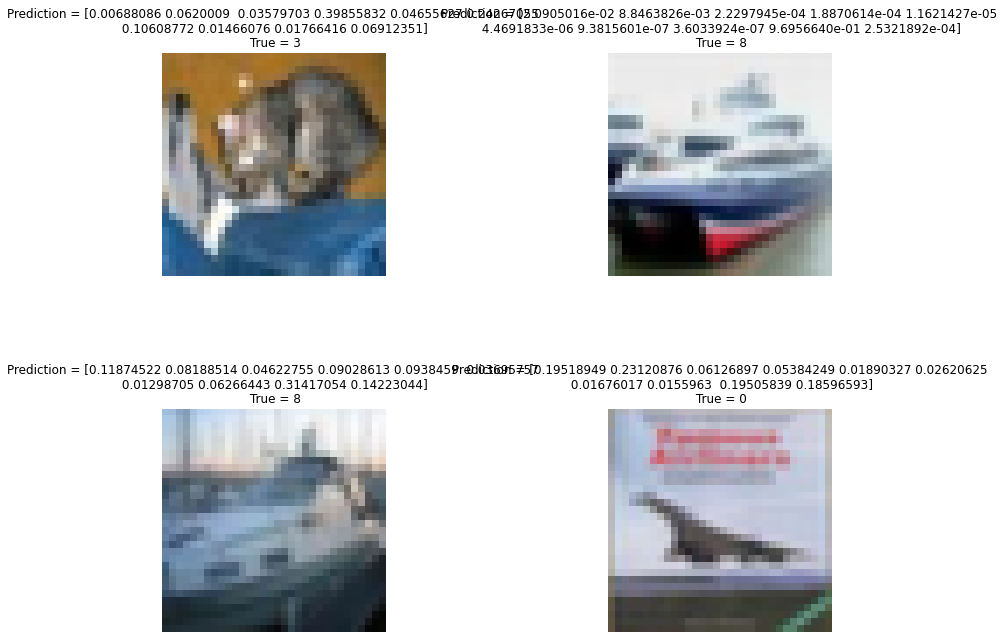

In [26]:
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

# STEP #6: SAVING THE MODEL

In [ ]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

# STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [ ]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

In [ ]:
n = 8 
X_train_sample = X_train[:n]

In [ ]:
X_train_sample.shape

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

In [ ]:
from scipy.misc import toimage

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(toimage(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;


# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [ ]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)

# GREAT JOB! 